In [1]:
# imports libraries
import pickle										# import/export lists
import datetime										# dates
import string										# string parsing
import re 											# regular expression
import pandas as pd									# dataframes
import numpy as np									# numerical computation
import matplotlib.pyplot as plt						# plot graphics
import nltk											# natural language process
from nltk.corpus import stopwords					# stop words
from nltk import word_tokenize						# word tokens
from nltk.util import ngrams						# ngrams
import seaborn as sns								# graphics supplemental

In [3]:
# opens raw data
with open ('../data/clean_data/df_profile', 'rb') as fp:
    df = pickle.load(fp)
    
# creates subset of data of users with profiles
hasprofile = [row != '' for row in df['profile']]
df_profile = df.loc[hasprofile, ].copy()

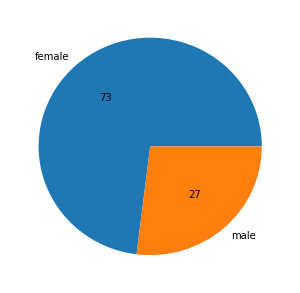

In [5]:
# finds gender breakdown
profile_text = [list(set(row.lower().translate(str.maketrans('', '', string.punctuation)).split())) 
              for row in df_active.loc[hasprofile, 'profile']]
female = ['female' in row and 'male' not in row for row in profile_text]
male = ['male' in row and 'female' not in row for row in profile_text]
gender = pd.Series([sum(female), sum(male)], index = ['female', 'male'])

# plots chart
gender.plot.pie(autopct='%.f', figsize=(5,5))
plt.ylabel('')
plt.show()

In [76]:
tokens = [word_tokenize(row.lower()) for row in df_profile['profile']]

In [92]:
tokens_nopunct = [[subrow for subrow in row 
                   if len(set(subrow).intersection(string.punctuation)) == 0]
                  for row in tokens]

In [94]:
tokens_nopunct_stem = [[stemmer.stem(word) for word in row]
                       for row in tokens_nopunct]

In [102]:
tokens_nopunct_stem_nostop = [[word for word in row if word not in stop_list]
                       for row in tokens_nopunct_stem]

In [110]:
nopunct_stem_nostop = [' '.join(row) for row in tokens_nopunct_stem_nostop]

In [112]:
import random
target = random.sample(k=len(nopunct_stem_nostop))

TypeError: sample() missing 1 required positional argument: 'population'

In [111]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(nopunct_stem_nostop, target)

/home/lily-tian/miniconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


In [48]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [96]:
# sets stop word list for text parsing
stop_list = stopwords.words('english')

In [9]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [43]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [44]:
import numpy as np
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.81691449814126393